In [2]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
from scipy.stats import norm,kurtosis
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [3]:
dataframe = pd.read_csv('tuition_info.csv')

In [4]:
dataframe.describe()

serial  student_no        hour        days    subjects       salary
count  100.000000  100.000000  100.000000  100.000000  100.000000    100.00000
mean    50.500000    1.060000    1.570000    3.830000    3.420000   5615.00000
std     29.011492    0.238683    0.517472    0.817177    1.634106   2174.06081
min      1.000000    1.000000    1.000000    2.000000    1.000000   2000.00000
25%     25.750000    1.000000    1.000000    3.000000    2.000000   4000.00000
50%     50.500000    1.000000    2.000000    4.000000    3.000000   5000.00000
75%     75.250000    1.000000    2.000000    4.000000    5.000000   6000.00000
max    100.000000    2.000000    3.000000    6.000000    8.000000  15000.00000

In [5]:
dataframe.columns

Index(['serial', 'type', 'student_no', 'gender', 'hour', 'days', 'class',
       'subjects', 'location', 'background', 'institute', '    offer_date',
       'salary'],
      dtype='object')

In [6]:
dataframe["gender"] = dataframe["gender"].astype('category').cat.codes

In [7]:
dataframe["type"] = dataframe["type"].astype('category').cat.codes

In [8]:
dataframe["class"] = dataframe["class"].astype('category').cat.codes

In [9]:
dataframe["location"] = dataframe["location"].astype('category').cat.codes

In [10]:
dataframe["background"] = dataframe["background"].astype('category').cat.codes

In [11]:
dataframe["institute"] = dataframe["institute"].astype('category').cat.codes

In [12]:
dataframe['    offer_date'] = dataframe['    offer_date'].astype('category').cat.codes

In [13]:
dataframe

serial  type  student_no  gender  hour  days  class  subjects  location  \
0        1     1           1       2     2     4     19         3        12   
1        2     0           1       0     2     4     21         3        25   
2        3     0           1       0     2     3     21         1        18   
3        4     0           1       0     2     4     29         2        18   
4        5     0           1       1     2     4     28         3        25   
..     ...   ...         ...     ...   ...   ...    ...       ...       ...   
95      96     0           1       0     1     4     14         1        46   
96      97     1           1       0     2     3      1         1        12   
97      98     1           1       0     2     3     15         2        12   
98      99     0           1       0     2     3     12         4         7   
99     100     1           1       0     2     3      4         4        12   

    background  institute      offer_date  salary  
0            0          1               0    6000  
1            1          0               0   10000  
2            1          0               0    4000  
3            1          0               0    8000  
4            1          0               0    8000  
..         ...        ...             ...     ...  
95           0          0               8    3000  
96           1          0               8    3000  
97           1          0               8    5000  
98           0          2               8    6000  
99           0          0               9    8000  

[100 rows x 13 columns]

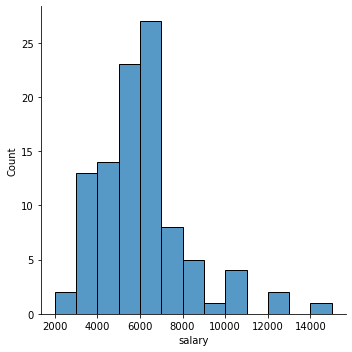

In [14]:

sns.displot(dataframe, x="salary", binwidth = 1000)

<AxesSubplot:xlabel='salary', ylabel='Density'>

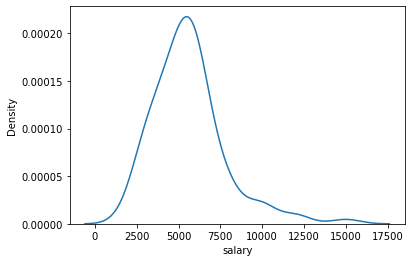

In [15]:
sns.kdeplot(data=dataframe, x="salary")

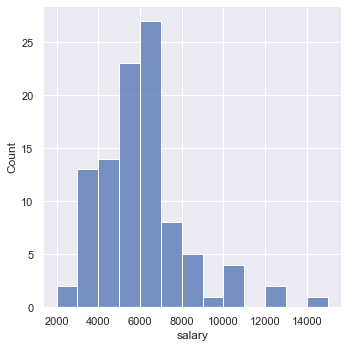

In [16]:
sns.set_theme()
sns.displot(dataframe, x="salary", binwidth = 1000)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

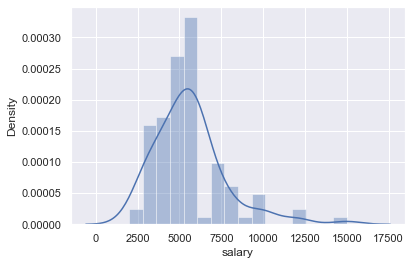

In [17]:
sns.distplot(dataframe['salary'], kde=True)

<AxesSubplot:xlabel='salary', ylabel='Count'>

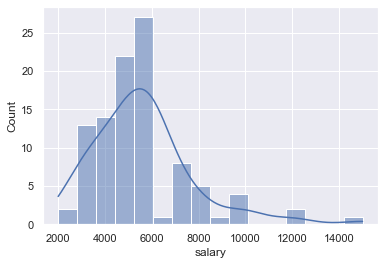

In [18]:
sns.histplot(data=dataframe, x="salary", kde=True)

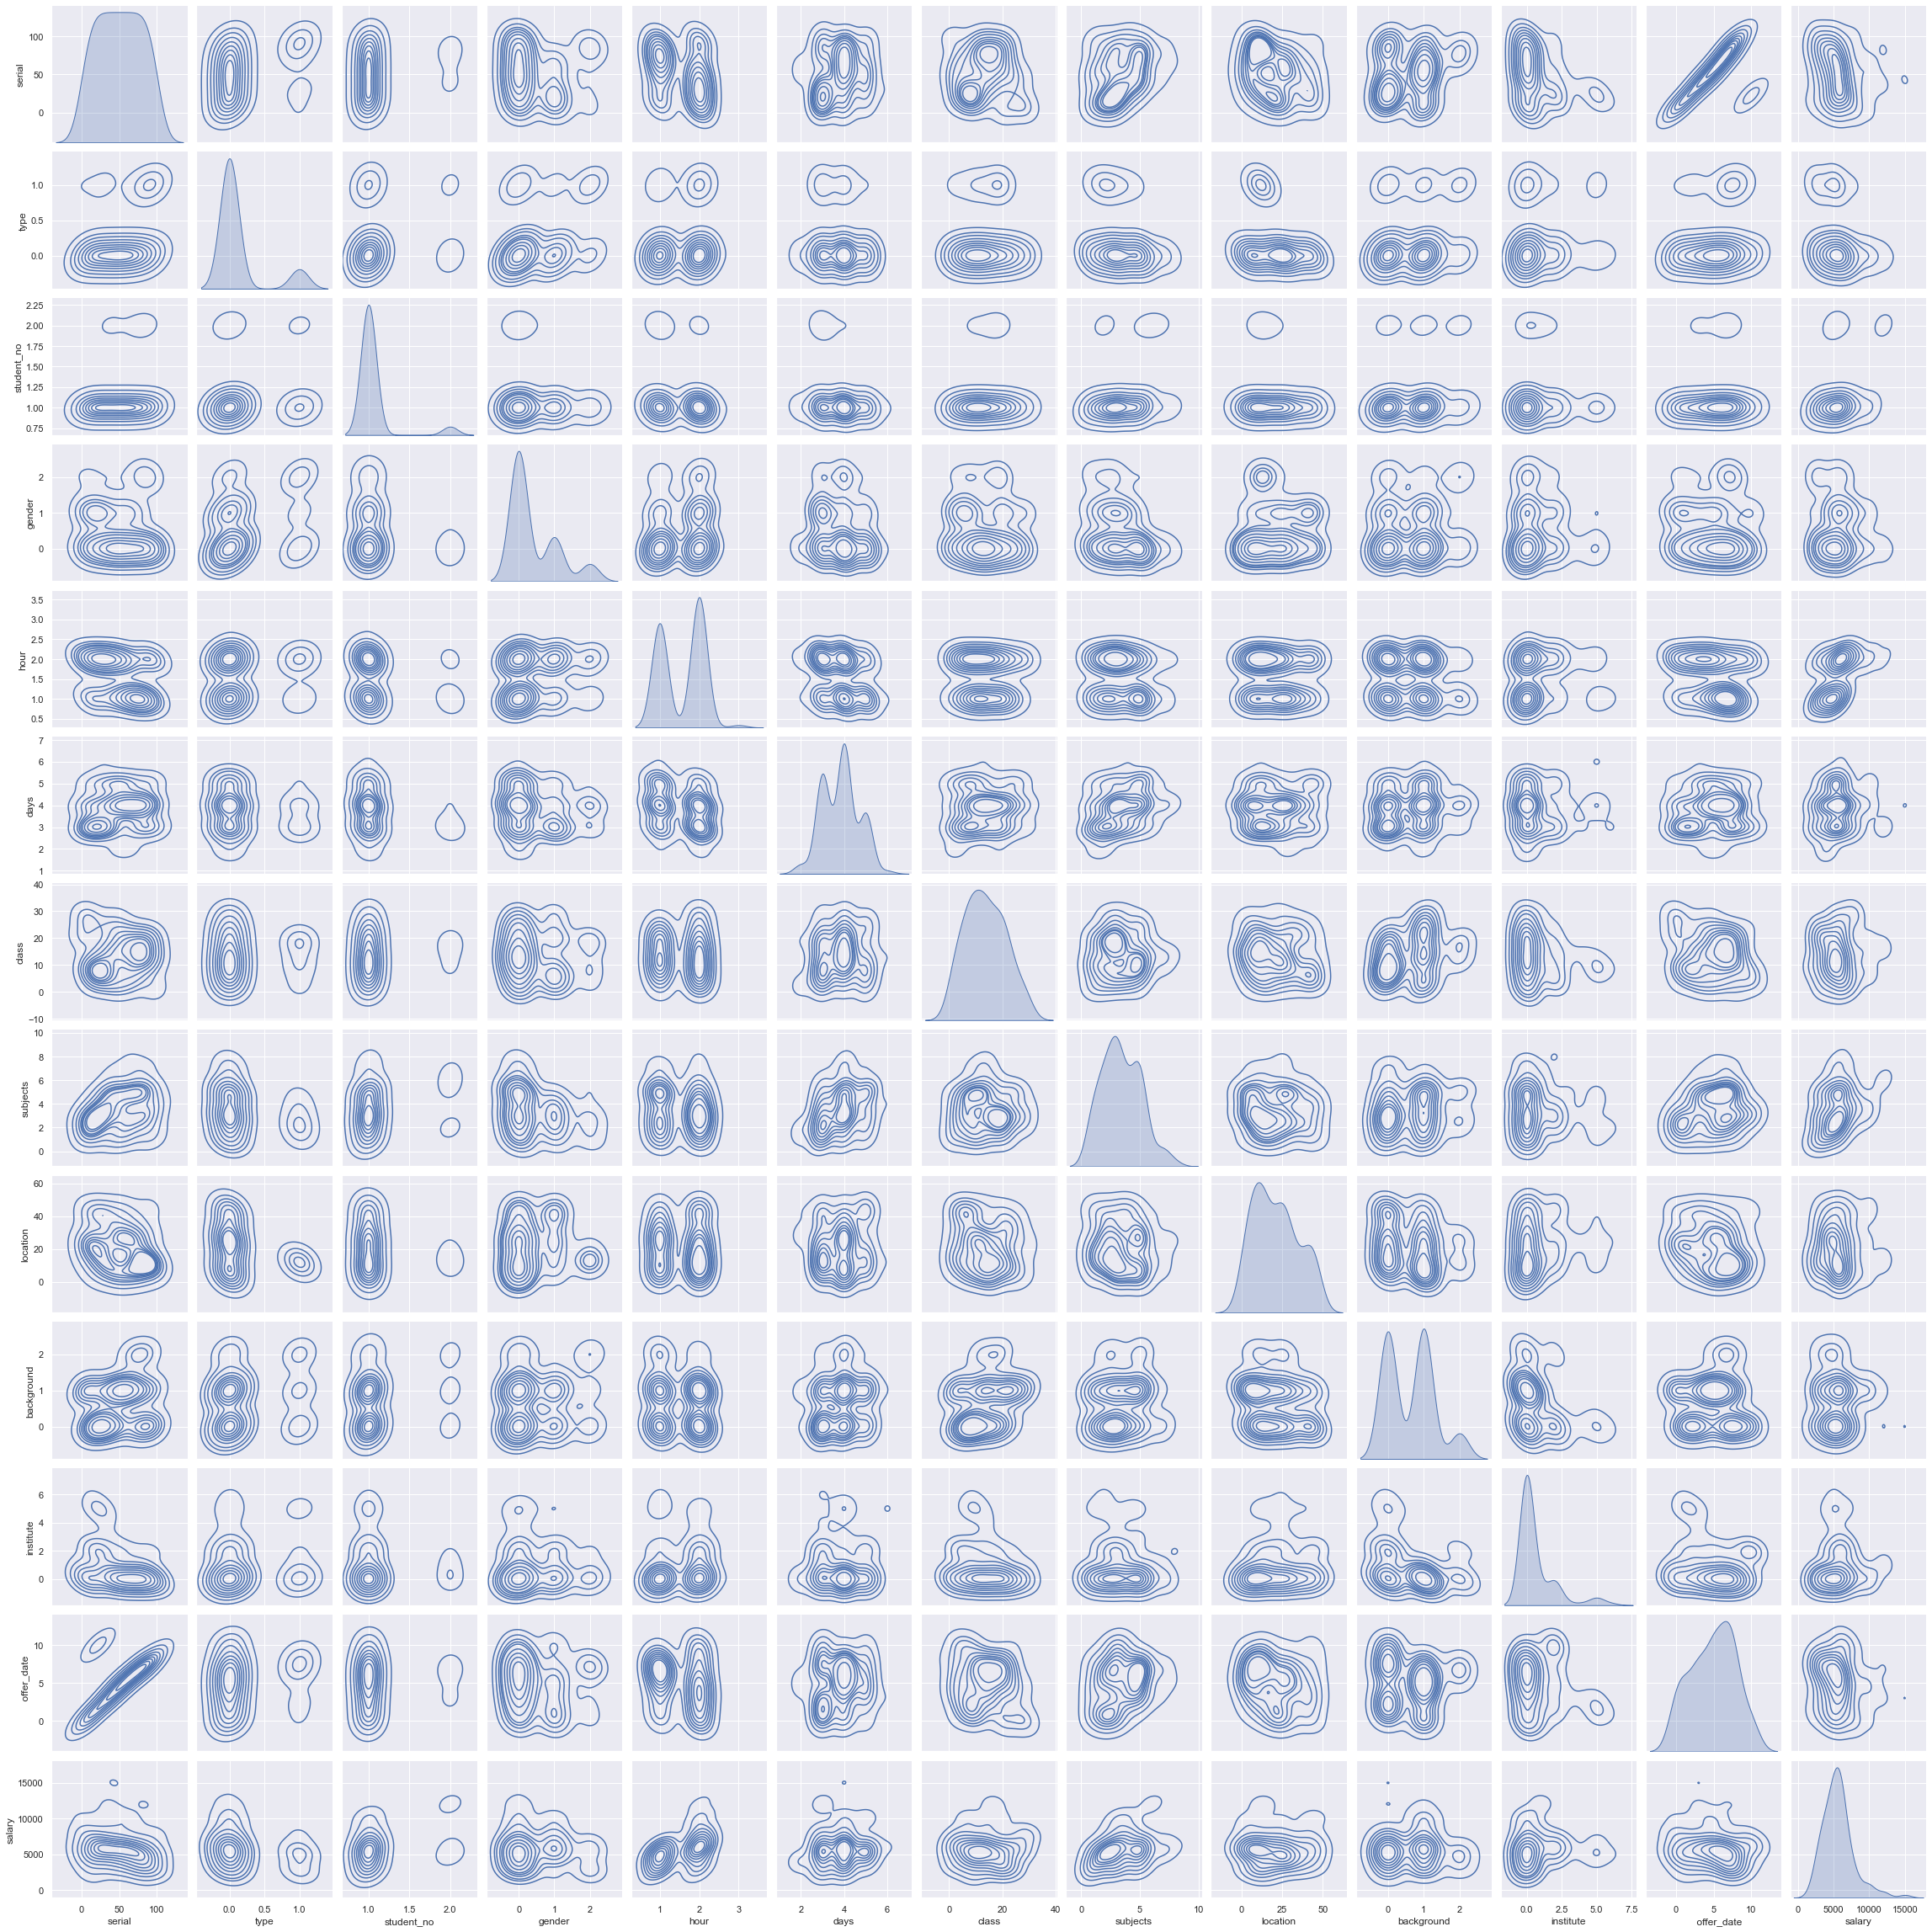

In [19]:
sns_plot = sns.pairplot(dataframe,kind = 'kde' ,height=2.5)
sns_plot.savefig("output.png")

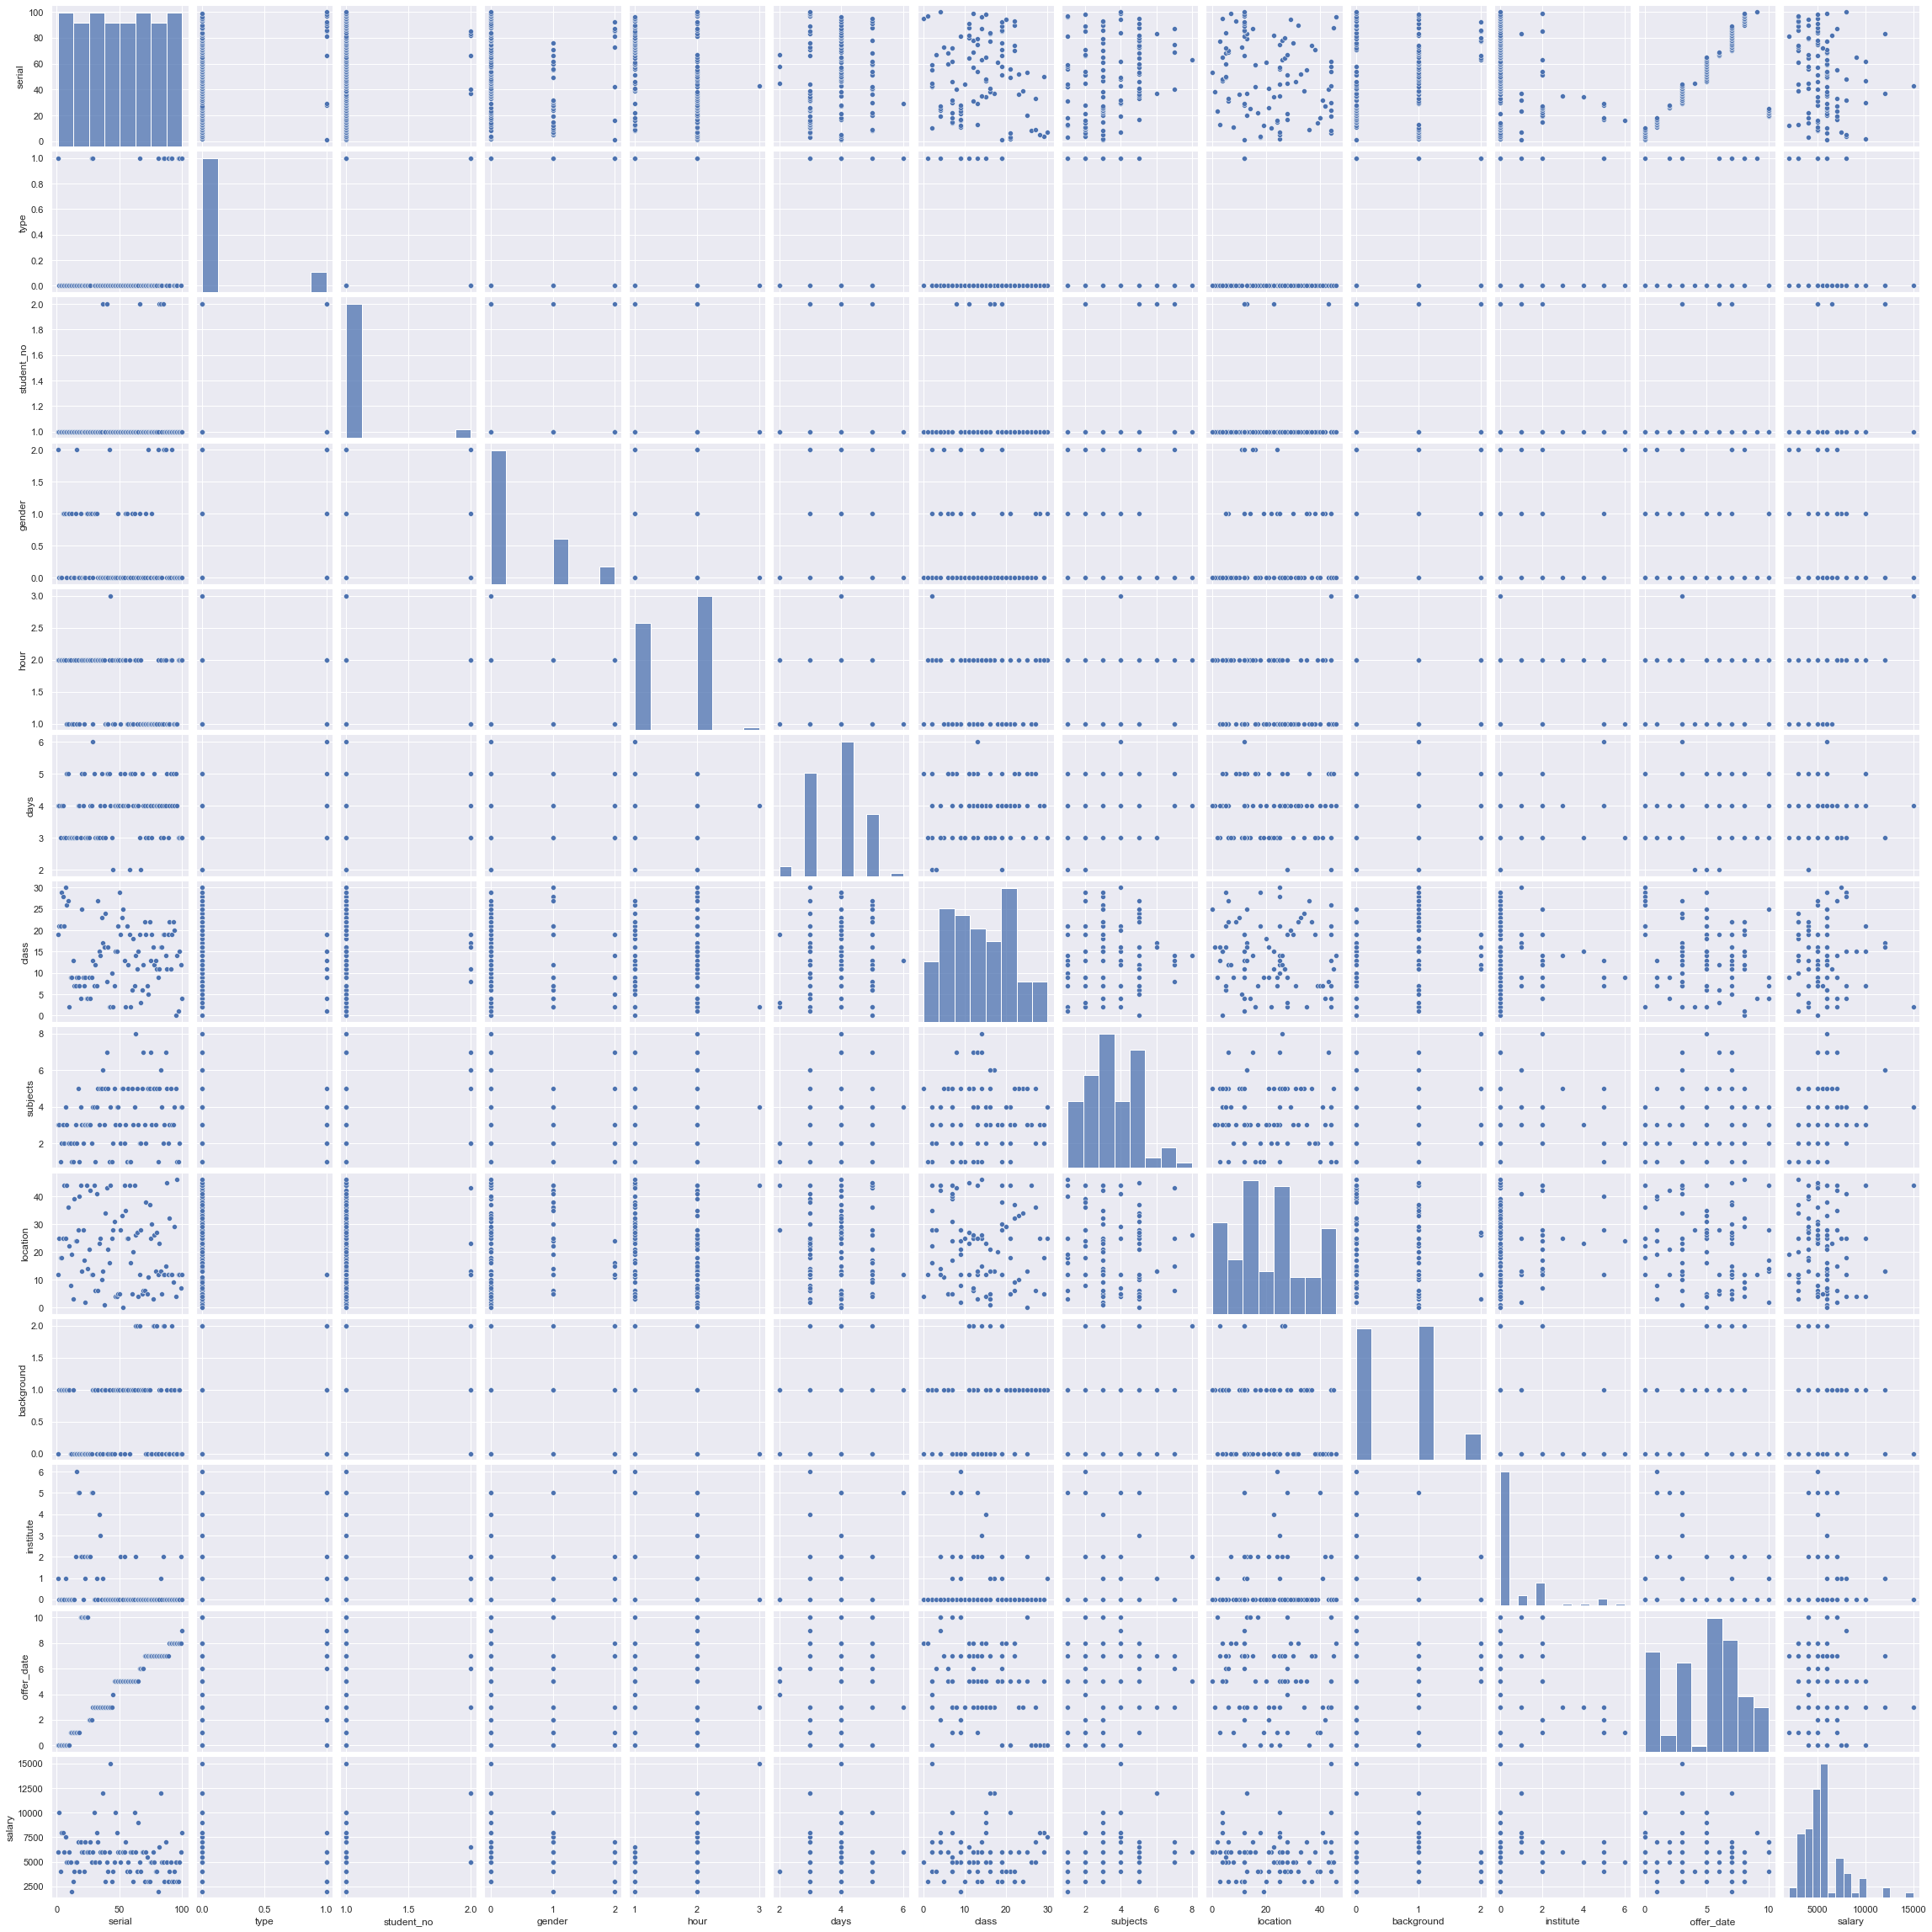

In [20]:
sns_plot = sns.pairplot(dataframe,height=2.5)
sns_plot.savefig("output.png")

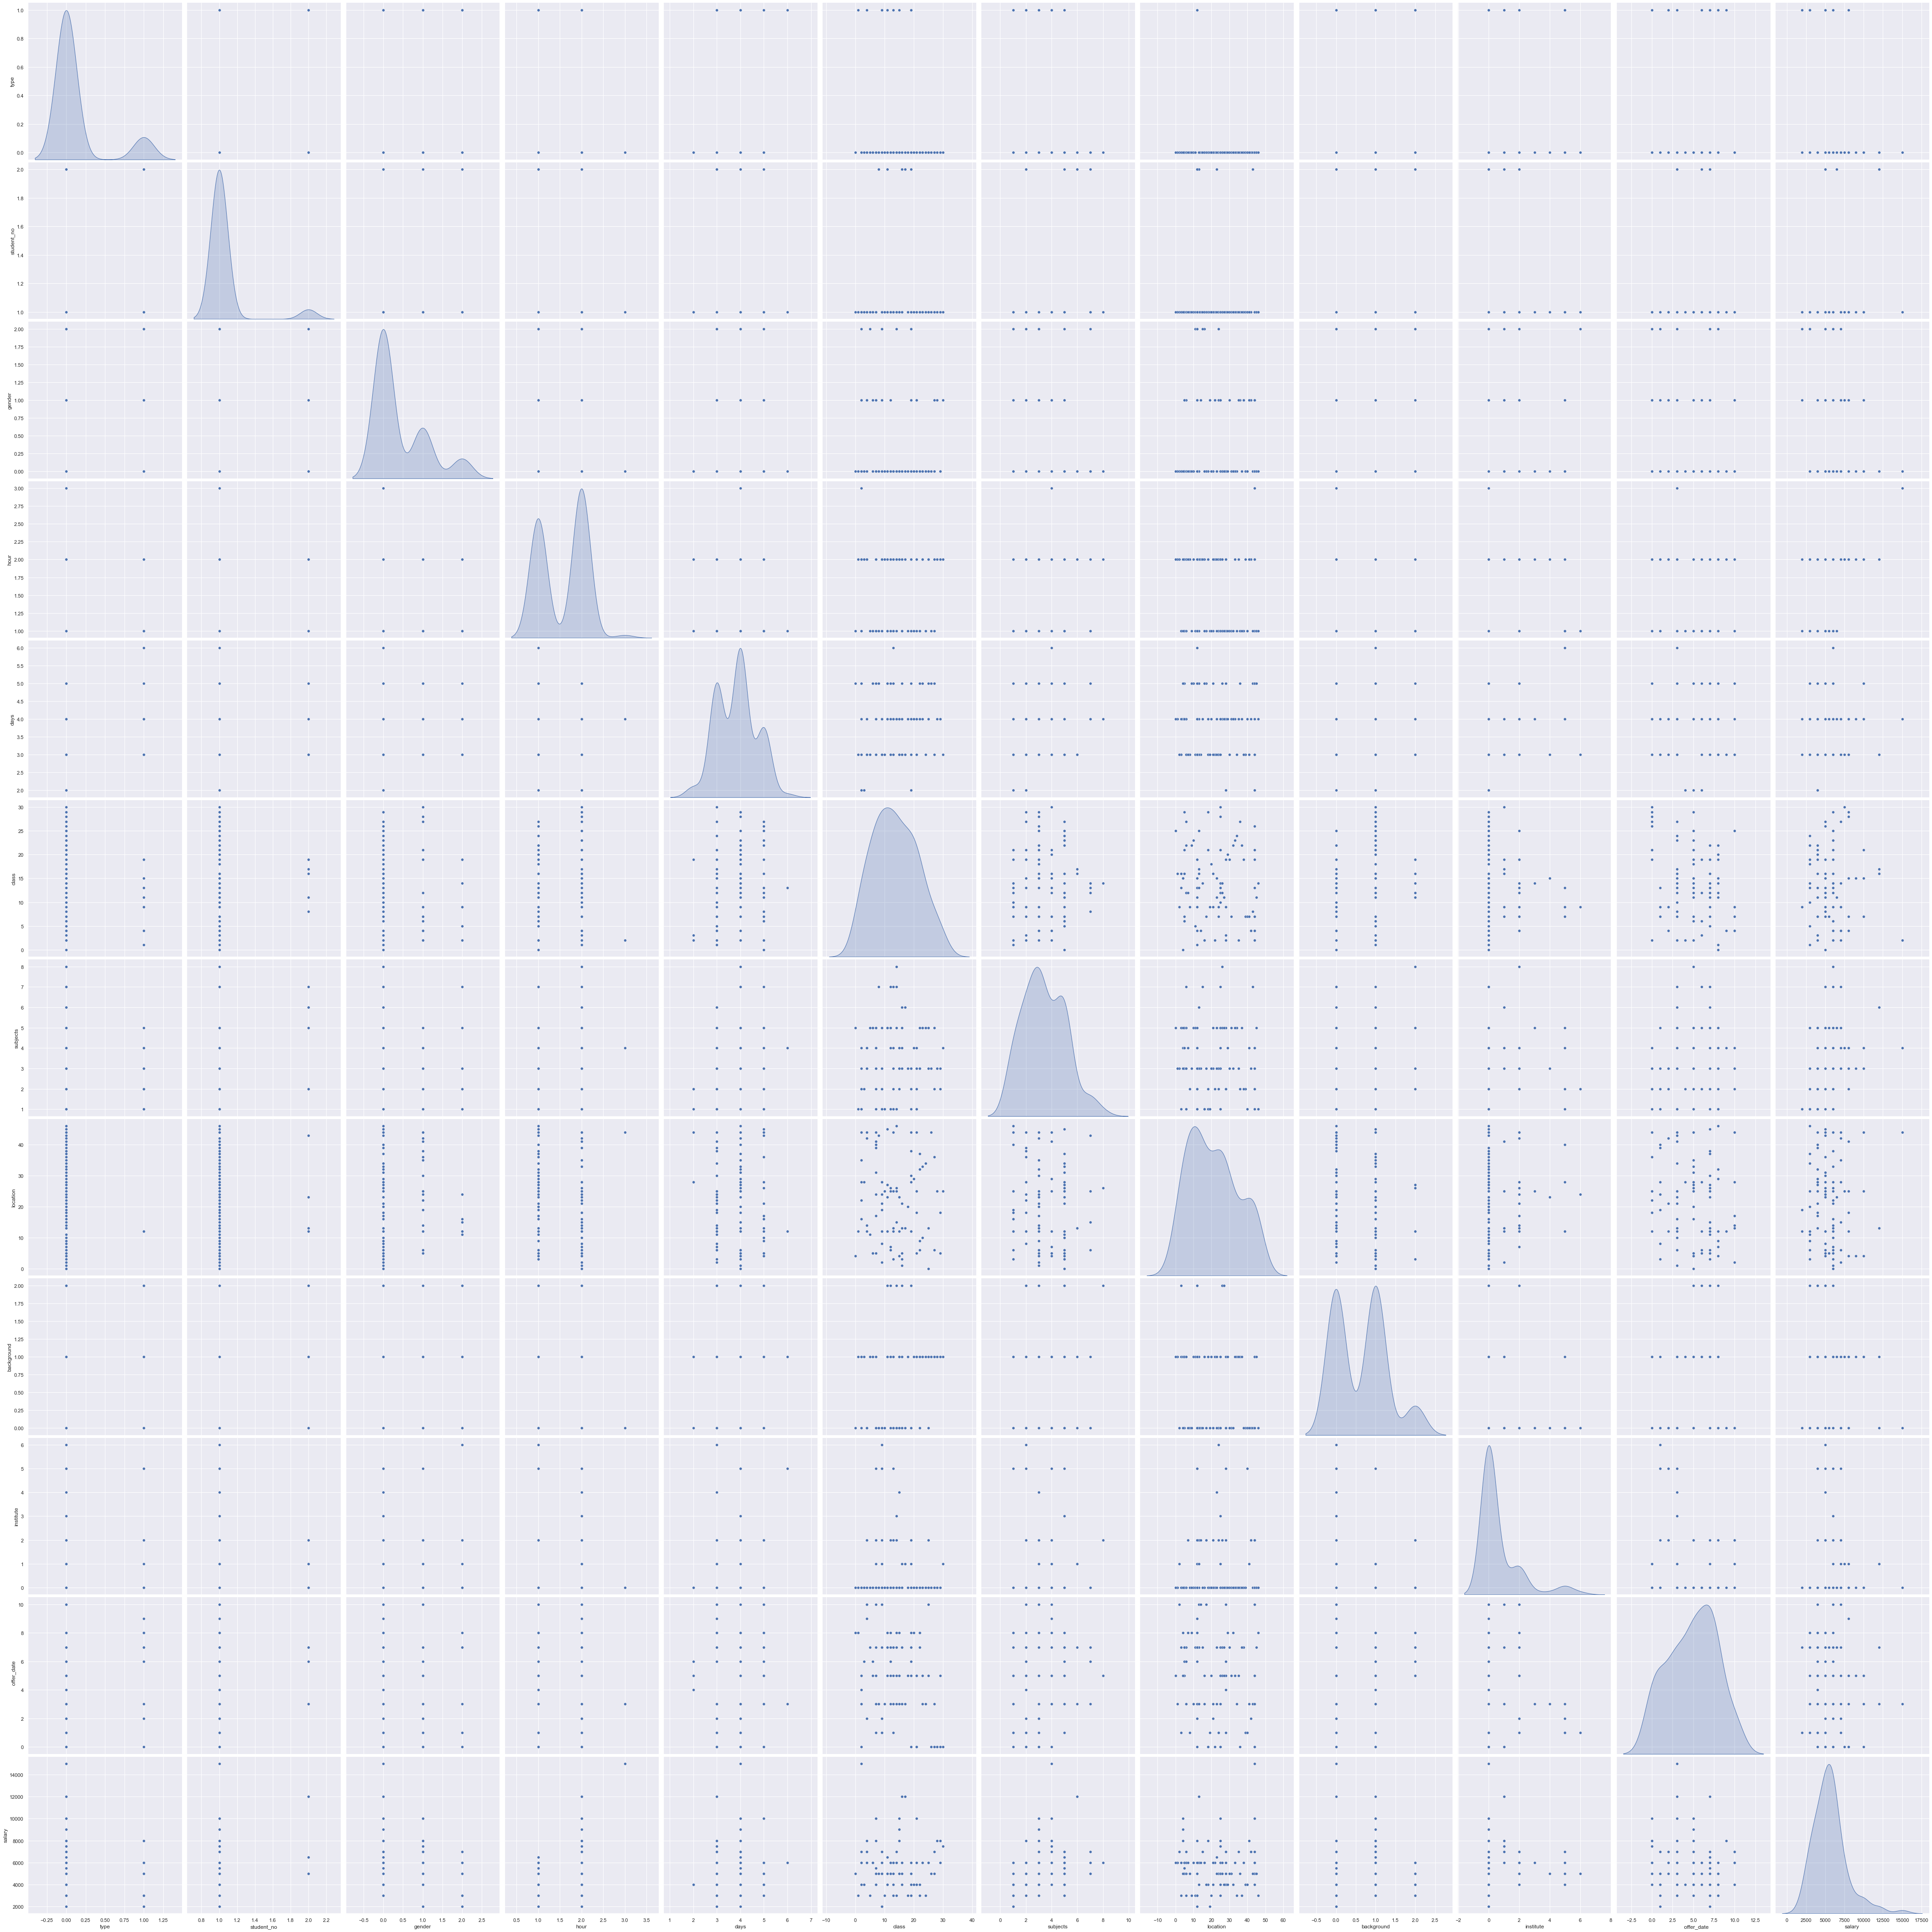

In [21]:
sns_plot = sns.pairplot(dataframe, 
                        vars = ['type', 'student_no', 'gender', 'hour', 'days', 'class',
                                   'subjects', 'location', 'background', 'institute', '    offer_date',
                               'salary'],
                        diag_kind = 'kde',
                        height=5)
sns_plot.savefig("output.png")

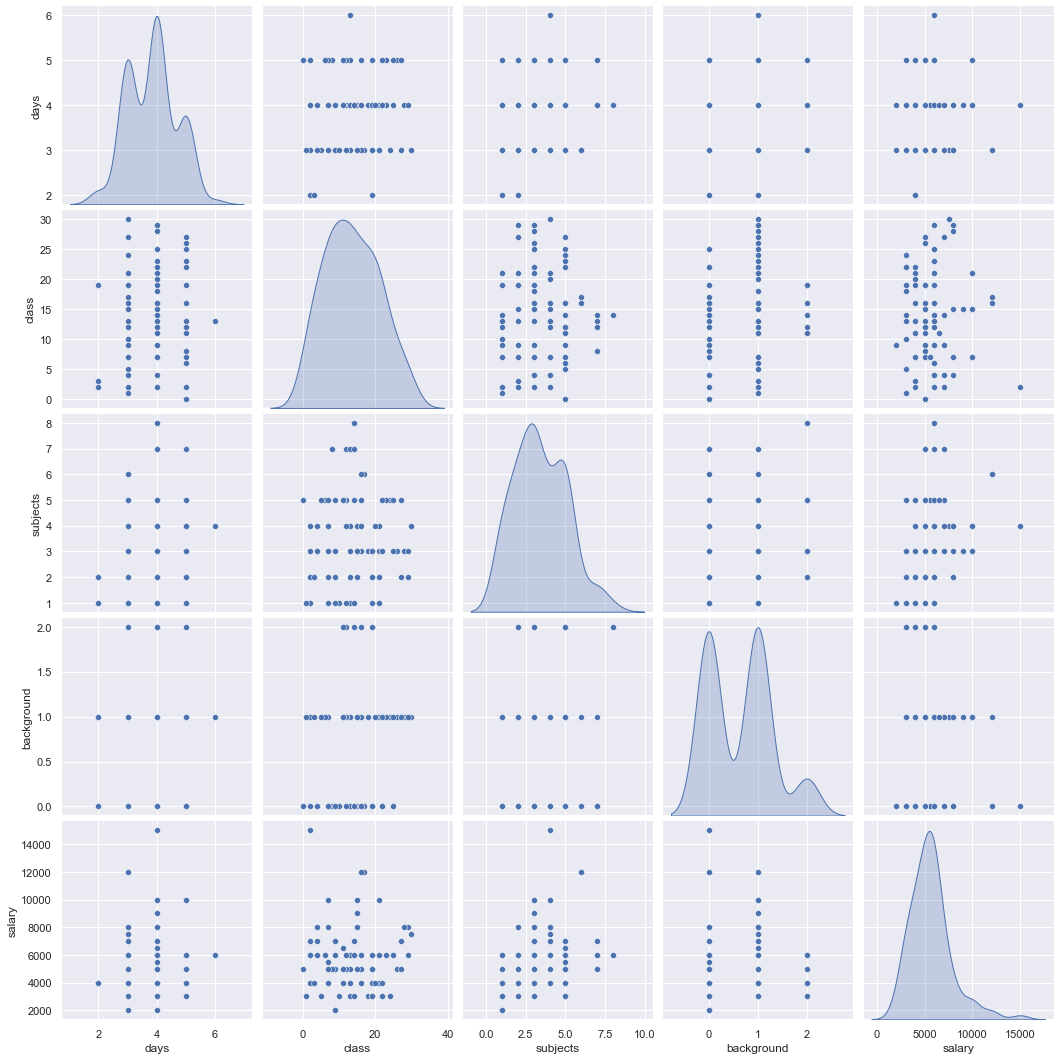

In [22]:
sns_plot = sns.pairplot(dataframe, 
                        vars = ['days','class','subjects','background', 'salary'],
                        diag_kind = 'kde',
                        height = 3)
sns_plot.savefig("output.png")

In [23]:
dataframe['natural_log'] = np.log(dataframe['salary']) 

In [24]:
dataframe['logarithm_base2'] = np.log2(dataframe['salary']) 

In [25]:
dataframe.head()

serial  type  student_no  gender  hour  days  class  subjects  location  \
0       1     1           1       2     2     4     19         3        12   
1       2     0           1       0     2     4     21         3        25   
2       3     0           1       0     2     3     21         1        18   
3       4     0           1       0     2     4     29         2        18   
4       5     0           1       1     2     4     28         3        25   

   background  institute      offer_date  salary  natural_log  logarithm_base2  
0           0          1               0    6000     8.699515        12.550747  
1           1          0               0   10000     9.210340        13.287712  
2           1          0               0    4000     8.294050        11.965784  
3           1          0               0    8000     8.987197        12.965784  
4           1          0               0    8000     8.987197        12.965784

<AxesSubplot:xlabel='natural_log', ylabel='Count'>

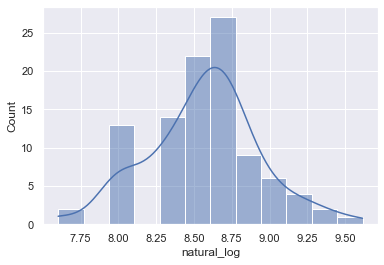

In [26]:
sns.histplot(data=dataframe, x="natural_log", kde=True)

<AxesSubplot:xlabel='logarithm_base2', ylabel='Count'>

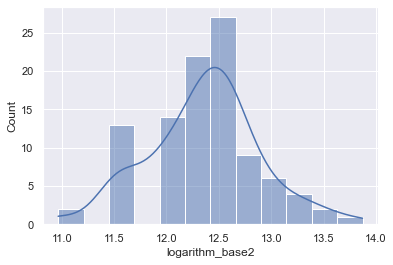

In [27]:
sns.histplot(data=dataframe, x="logarithm_base2", kde=True)

In [28]:
kurtosis(dataframe['salary'])

3.3671414661583006

In [29]:
kurtosis(dataframe['natural_log'])

0.40065666719908766

In [30]:
kurtosis(dataframe['logarithm_base2'])

0.40065666719908855

In [31]:
train,test = train_test_split(dataframe,test_size=0.15,random_state=42)

In [ ]:
sns_plot = sns.pairplot(dataframe, 
                        vars = ['days','class','subjects','background', 'salary'],
                        diag_kind = 'kde',
                        height = 3)
sns_plot.savefig("output.png")

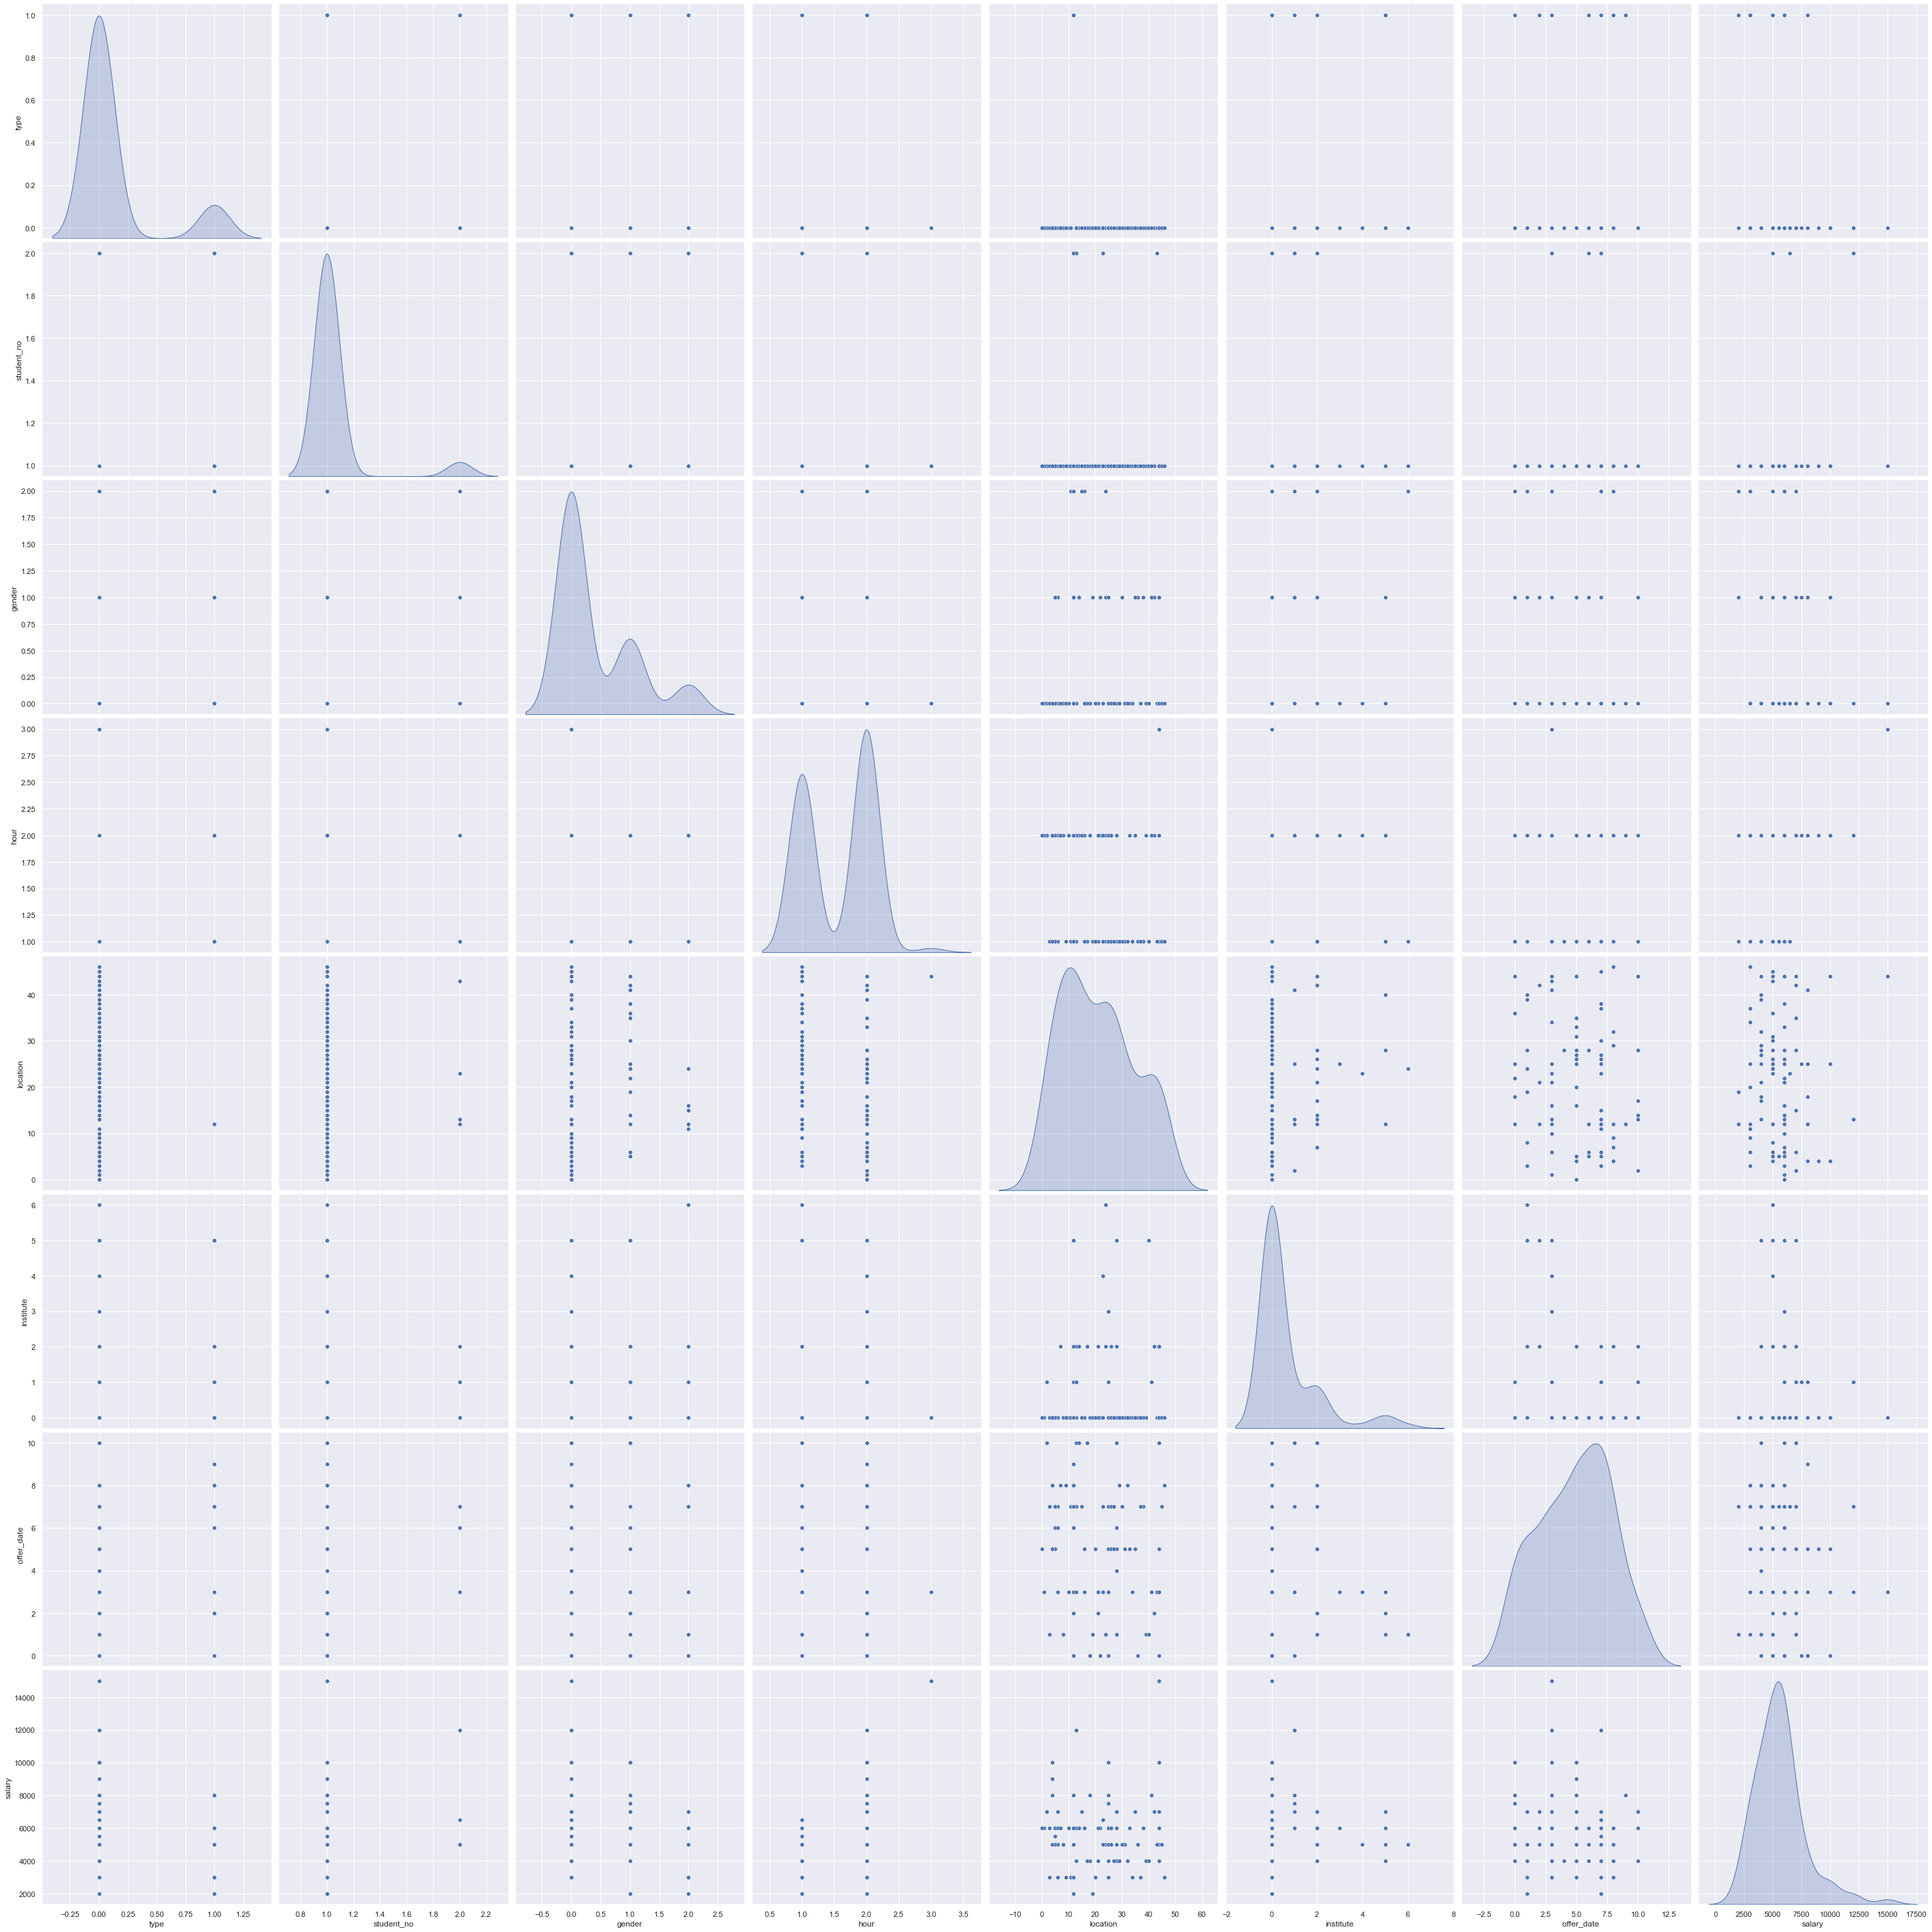

In [32]:
sns_plot = sns.pairplot(dataframe, 
                        vars = ['type', 'student_no', 'gender', 'hour', 
                                   'location', 'institute', '    offer_date',
                               'salary'],
                        diag_kind = 'kde',
                        height=5)
sns_plot.savefig("output.png")

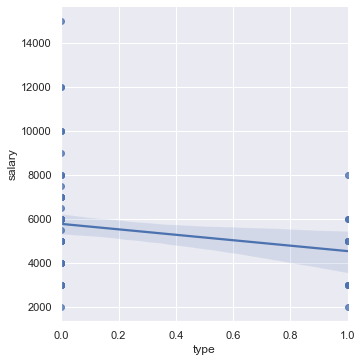

In [34]:
sns.lmplot(x="type", y="salary", data=dataframe)

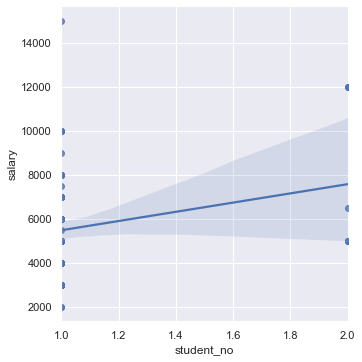

In [36]:
sns.lmplot(x='student_no', y="salary", data=dataframe)

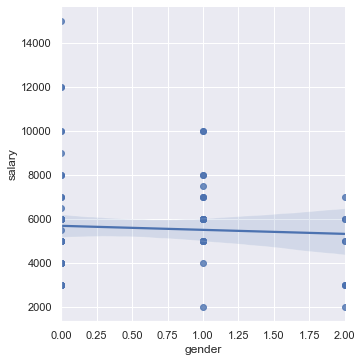

In [37]:
sns.lmplot(x='gender', y="salary", data=dataframe)

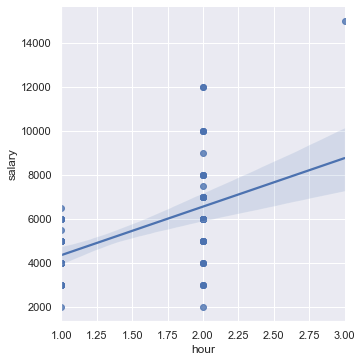

In [38]:
sns.lmplot(x='hour', y="salary", data=dataframe)

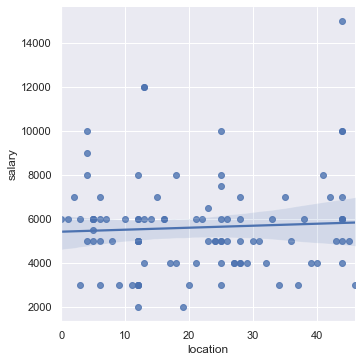

In [39]:
sns.lmplot(x='location', y="salary", data=dataframe)

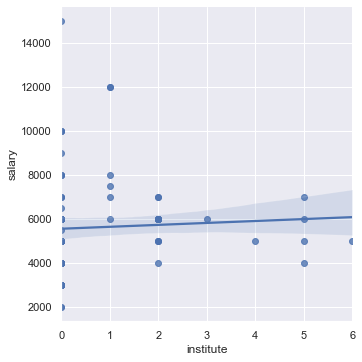

In [40]:
sns.lmplot(x='institute', y="salary", data=dataframe)

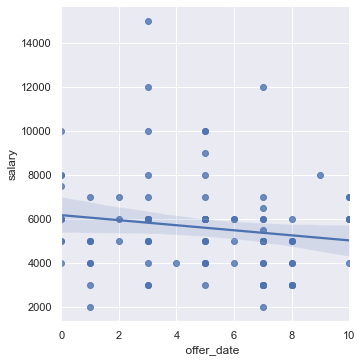

In [41]:
sns.lmplot(x='    offer_date', y="salary", data=dataframe)

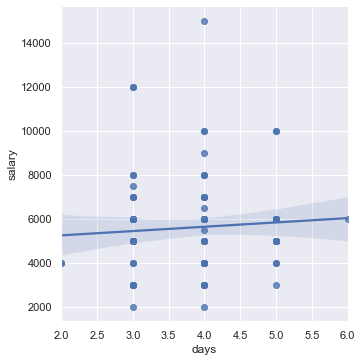

In [42]:
sns.lmplot(x='days', y="salary", data=dataframe)

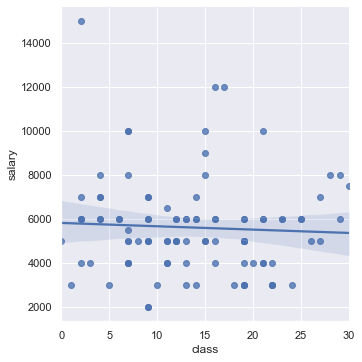

In [43]:
sns.lmplot(x='class', y="salary", data=dataframe)

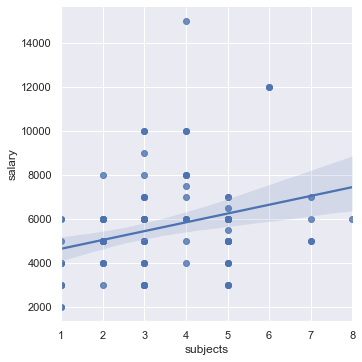

In [45]:
sns.lmplot(x='subjects', y="salary", data=dataframe)

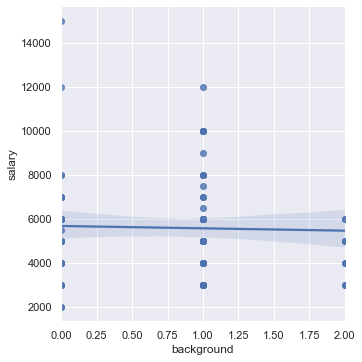

In [46]:
sns.lmplot(x='background', y="salary", data=dataframe)

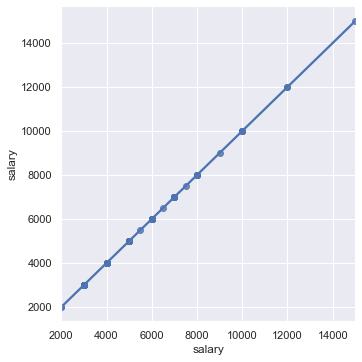

In [47]:
sns.lmplot(x='salary', y="salary", data=dataframe)

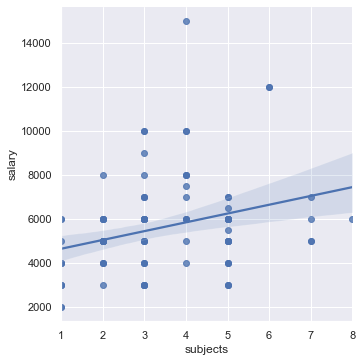

In [48]:
sns.lmplot(x='subjects', y="salary", data=dataframe)